<a href="https://colab.research.google.com/github/NDK2212/Project-Regression-/blob/main/Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Epoch: 0 - Loss: 1.5375273395758173
Epoch: 50 - Loss: 0.6843135263640602
Epoch: 100 - Loss: 0.5875870451968322
Epoch: 150 - Loss: 0.5690811291255856
Epoch: 200 - Loss: 0.5592289487216543
Epoch: 250 - Loss: 0.5508514723601186
Epoch: 300 - Loss: 0.5431674955880179
Epoch: 350 - Loss: 0.5360551088196405
Epoch: 400 - Loss: 0.5294632854052095
Epoch: 450 - Loss: 0.523351311075933
Epoch: 500 - Loss: 0.5176823315845448
Epoch: 550 - Loss: 0.5124224665461565
Epoch: 600 - Loss: 0.5075405119411663
Epoch: 650 - Loss: 0.5030077196681211
Epoch: 700 - Loss: 0.49879760035272647
Epoch: 750 - Loss: 0.4948857426505533
Epoch: 800 - Loss: 0.4912496472031169
Epoch: 850 - Loss: 0.48786857400513556
Epoch: 900 - Loss: 0.4847234020880814
Epoch: 950 - Loss: 0.48179650051919276
Epoch: 1000 - Loss: 0.47907160979725144
Epoch: 1050 - Loss: 0.47653373280140293
Epoch: 1100 - Loss: 0.4741690345180959
Epoch: 1150 - Loss: 0.47196474983437453
Epoch: 1200 - Loss: 0.469909098743756
Epoch: 1250 - Loss: 0.4679912083641731
Epoch

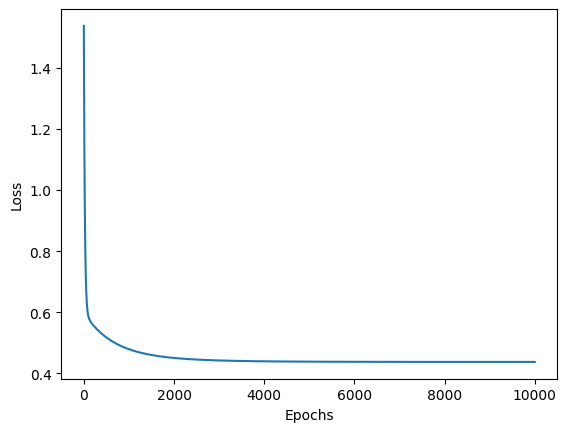

In [13]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = np.mean((self.y_target - y_pred)**2)*(1/2)
        return loss

    def predict(self, X_data):
        y_pred = (X_data) @ self.theta
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            y_pred = self.predict(self.X_data)
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)
            gradient = (self.X_data).T @(y_pred - self.y_target) / (self.num_samples)
            self.theta = self.theta - self.learning_rate*gradient
            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

np.random.seed(10)
y_target = np.random.randn(1000,1)
x_data = np.random.rand(1000, 5)
CustomLinReg = CustomLinearRegression(x_data, y_target)
CustomLinReg.fit()
print(CustomLinReg.losses)
x_range = list(range(10000))
plt.plot(x_range, CustomLinReg.losses[:])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [15]:

def r2score(y_pred, y):
  rss = np.sum((y - y_pred)**2)
  tss = np.sum((y - y.mean())**2)
  r2 = 1 - rss/tss
  return r2

#Case 1
y_pred = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
print(r2score(y_pred,y))

#Case 2
y_pred = np.array([1,2,3,4,5])
y = np.array([3,5,5,2,4])
print(r2score(y_pred,y))

1.0
-2.235294117647059


In [24]:
def create_polynomial_feature(X_data, degree=2):
  for d in range(2,degree+1):
    X_data = np.c_[X_data, np.power(X[:,0],d)]
  return X_data



X = np.array([[1],
              [2],
              [3]])
degree = 2
X_new = create_polynomial_feature(X,degree)
X_new

array([[1, 1],
       [2, 4],
       [3, 9]])

In [26]:
def create_polynomial_multiple_feature(X_data, degree=2):
  for d in range(X_data.shape[1]):
    X_data = np.c_[X_data[:,:2*d+1], X_data[:,2*d]**2, X_data[:,2*d+1:]]
  return X_data

X = np.array([[1,2],
              [2,3],
              [3,4]])
degree = 2
X_poly = create_polynomial_multiple_feature(X,degree)
X_poly

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

In [30]:
df = pd.read_csv('/content/drive/MyDrive/AIO2024-017/MODULE 4/SalesPrediction.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [34]:
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [35]:
#Handle Null values
df = df.fillna(df.mean())

#Get features
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega','Influencer_Micro', 'Influencer_Nano']]
y = df[['Sales']]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
scaler.mean_[0]
X_test_processed = scaler.fit_transform(X_test)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.fit_transform(X_test_processed)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

-2.2119776223197106e+21